In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,company_txt,job_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,SQL_yn,tableau_yn
0,Data Scientist,$66K-$108K (Glassdoor est.),"As a part of the Data Science team, you will r...",3.9,Grid Dynamics\n3.9,"Plano, TX",1001 to 5000 Employees,2006,Company - Private,Enterprise Software & Network Solutions,...,Grid Dynamics\n,TX,14,1,0,1,0,1,1,0
1,Senior Data Analytics/Scientist,$66K-$108K (Glassdoor est.),"Kingfisher Systems, Inc. specializes in provid...",4.5,"Kingfisher Systems, Inc.\n4.5","Bethesda, MD",51 to 200 Employees,2005,Company - Private,Federal Agencies,...,"Kingfisher Systems, Inc.\n",MD,15,1,0,0,0,0,1,1
2,Scientist/Senior Scientist - In Vitro Pharmaco...,$66K-$108K (Glassdoor est.),Sai Life Sciences is looking for Scientists an...,3.4,Sai Life Sciences\n3.4,"Cambridge, MA",1001 to 5000 Employees,1999,Company - Private,Biotech & Pharmaceuticals,...,Sai Life Sciences\n,MA,21,0,0,0,0,1,0,0
3,Medical Lab Scientist / MLT (ASCP Certified) -...,$66K-$108K (Glassdoor est.),Job Summary:ASCP or AMT Certification is requi...,3.8,Cleveland Clinic\n3.8,"Cleveland, OH",10000+ Employees,1921,Nonprofit Organization,Health Care Services & Hospitals,...,Cleveland Clinic\n,OH,99,0,0,0,0,0,0,0
4,Senior Genomic Data Scientist,$66K-$108K (Glassdoor est.),GeneDx is seeking a Senior Genomic Data Scient...,2.8,GeneDx\n2.8,"Gaithersburg, MD",201 to 500 Employees,-1,Company - Public,Biotech & Pharmaceuticals,...,GeneDx\n,MD,-1,1,0,0,1,0,1,0


In [4]:
len(df)

935

## More Data Clean Up

#### Remove Non-Data Science Roles

In [5]:
# identify non-DS jobs
df['non_DS'] = df['Job Title'].apply(lambda x: 1 if 'scientist' in x.lower() and 'data' not in x.lower() and 'machine learning' not in x.lower() else 0)

# drop them and reset index
df = df[df['non_DS'] != 1]
df.drop('non_DS',axis=1,inplace=True)
df.reset_index(inplace=True, drop=True)
len(df)

715

#### Simplify Titles and Assign Seniority

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simp.value_counts()

analyst           228
data engineer     181
data scientist    157
na                 74
mle                41
manager            32
director            2
Name: job_simp, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)

In [10]:
df.seniority.value_counts()

na        453
senior    260
jr          2
Name: seniority, dtype: int64

In [11]:
df.job_state.value_counts()

CA        131
VA         80
MA         45
MD         42
NY         40
TX         31
PA         29
Remote     28
IL         26
FL         24
WA         20
MO         19
NJ         16
US         16
DC         15
CT         15
TN         14
WI         12
SC         11
GA         11
NC         11
CO         11
MI         10
IA          9
MN          9
UT          8
AZ          6
AL          5
OH          5
NH          3
OR          3
KS          3
ID          2
IN          2
ND          1
VI          1
MS          1
Name: job_state, dtype: int64

In [12]:
# Job description lengths
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       3037
1       6690
2       2561
3       4208
4       2031
5       4011
6       6484
7       2692
8       4195
9       1445
10      4519
11      5148
12      4062
13      5495
14      3877
15      1972
16      3334
17      6517
18      2528
19      4462
20      5414
21      3744
22      1188
23      3301
24      3490
25      4844
26      2031
27      2506
28      3592
29      4474
30      2608
31      2121
32      3571
33      2840
34      7061
35      3677
36      3516
37      3972
38      2013
39      3542
40      3167
41      3178
42      4056
43      4651
44      5264
45      3359
46      3154
47      5017
48      2791
49      4327
50      4040
51      8130
52      3587
53      5470
54      5255
55      3527
56      6719
57      4440
58      5137
59      3113
60      2306
61      2121
62      3663
63      5560
64      2313
65      6589
66      1463
67      1353
68      3298
69      5339
70      4844
71      4427
72      4278
73      2865
74      4886
75      3661
76      6516

In [15]:
# remove \n and \r from company text
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\r', ''))

In [16]:
df['company_txt']

0                                Grid Dynamics
1                     Kingfisher Systems, Inc.
2                                       GeneDx
3                           Elder Research Inc
4                                Oasis Systems
5                                Herman Miller
6          State of Wisconsin Investment Board
7                                IFG Companies
8                                        Zynga
9                                       Cerner
10                              TACG Solutions
11                                   JSR Micro
12                                   Eversight
13                                       MITRE
14                          CACI International
15                                 Berg Health
16                            Northrop Grumman
17                                      Ecolab
18       St. Jude Children's Research Hospital
19                      Yorktown Systems Group
20                                DigitalOcean
21           

#### Bin Rating

In [19]:
def rating_bin(rating):
    if rating < 0.5:
        return 0
    elif rating <1.5:
        return 1
    elif rating <2.5:
        return 2
    elif rating <3.5:
        return 3
    elif rating <4.5:
        return 4
    else: 
        return 5

In [20]:
df['rating_bin'] = df['Rating'].apply(rating_bin)

## Explore Data

In [21]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,SQL_yn,tableau_yn,desc_len,rating_bin
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,3.666713,1813.128671,79.925874,136.625175,108.275524,31.537063,0.601399,0.009790,0.258741,0.302098,0.511888,0.644755,0.282517,3844.862937,3.774825
std,1.004059,560.310338,23.375904,36.899203,29.976163,33.706381,0.489953,0.098529,0.438250,0.459489,0.500209,0.478922,0.450539,1485.123062,0.942869
min,-1.000000,-1.000000,41.000000,71.000000,56.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.000000,0.000000
25%,3.400000,1958.000000,63.000000,108.000000,85.500000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2851.500000,3.000000
50%,3.800000,1996.000000,77.000000,136.000000,108.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3744.000000,4.000000
75%,4.200000,2007.000000,100.000000,163.000000,132.000000,42.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4717.000000,4.000000
max,5.000000,2019.000000,121.000000,201.000000,158.000000,169.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10359.000000,5.000000


<AxesSubplot:>

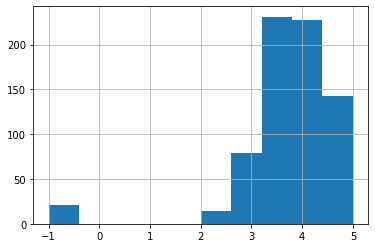

In [22]:
df.Rating.hist()

<AxesSubplot:>

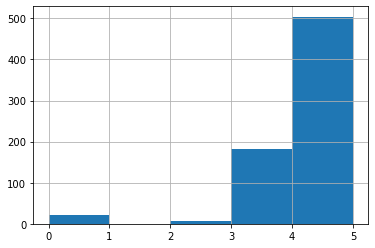

In [24]:
df.rating_bin.hist(bins=5)

<AxesSubplot:>

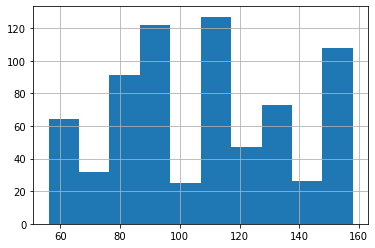

In [25]:
df.avg_salary.hist()

<AxesSubplot:>

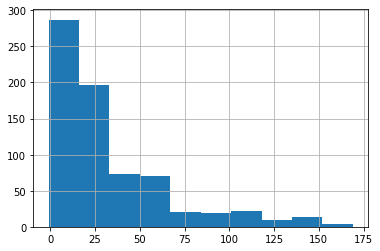

In [26]:
df.age.hist()

<AxesSubplot:>

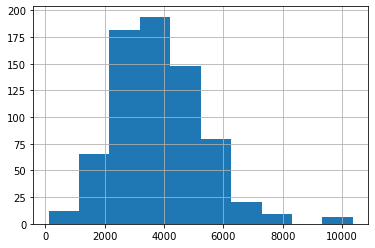

In [27]:
df.desc_len.hist()

<AxesSubplot:>

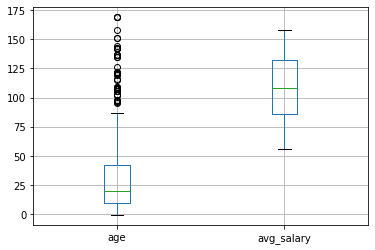

In [28]:
df.boxplot(column = ['age', 'avg_salary'])

<AxesSubplot:>

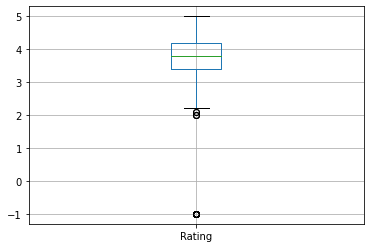

In [29]:
df.boxplot(column = 'Rating')

In [31]:
df[['age','avg_salary','desc_len']].corr()

,age,avg_salary,desc_len
age,1.000000,0.005212,0.112271
avg_salary,0.005212,1.000000,0.046510
desc_len,0.112271,0.046510,1.000000


<AxesSubplot:>

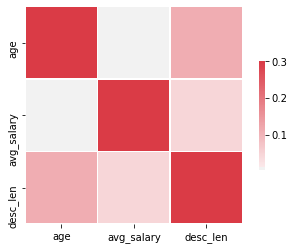

In [32]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','desc_len']].corr(),vmax=0.3, center=0, cmap=cmap,
           square=True, linewidth=0.5, cbar_kws={"shrink": 0.5})

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'SQL_yn', 'tableau_yn', 'job_simp',
       'seniority', 'desc_len', 'rating_bin'],
      dtype='object')

In [34]:
df_cat = df[['Location','Size','Type of ownership', 'Industry','Sector','Revenue','company_txt', 'job_state', 
    'python_yn', 'R_yn', 'spark_yn', 'aws_yn','excel_yn', 'SQL_yn', 'tableau_yn', 'job_simp', 'seniority', 'rating_bin']]

Graph for Location: total = 198


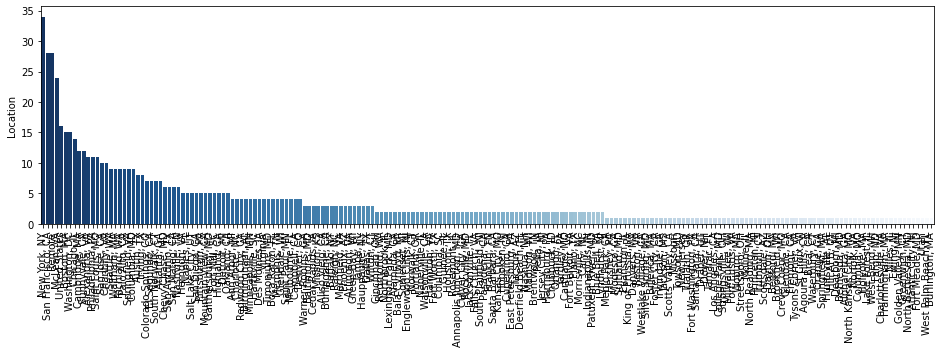

Graph for Size: total = 9


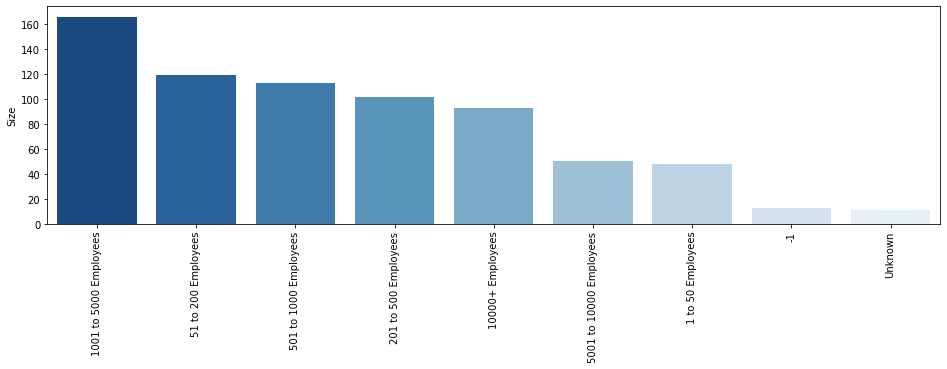

Graph for Type of ownership: total = 11


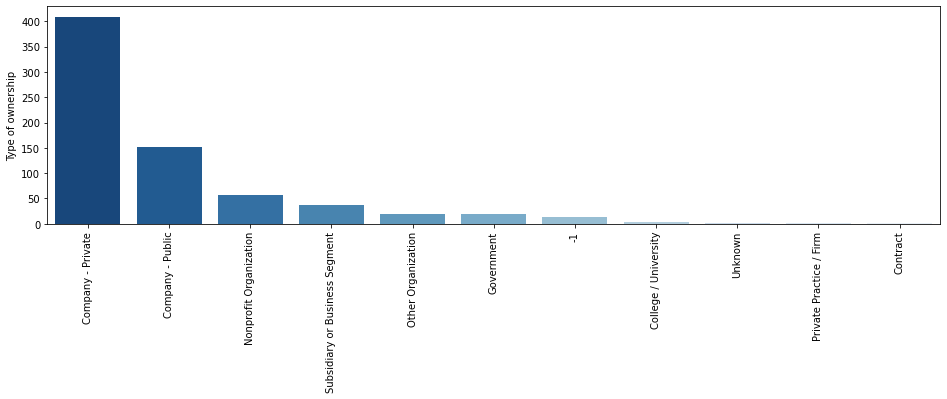

Graph for Industry: total = 60


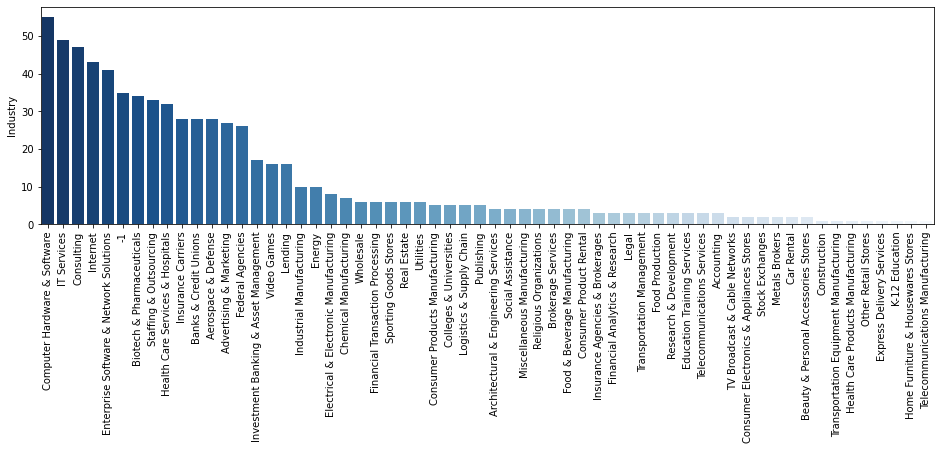

Graph for Sector: total = 24


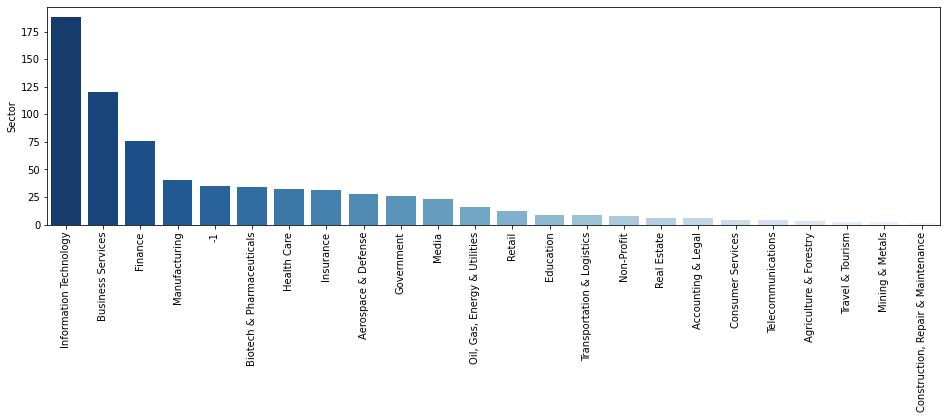

Graph for Revenue: total = 14


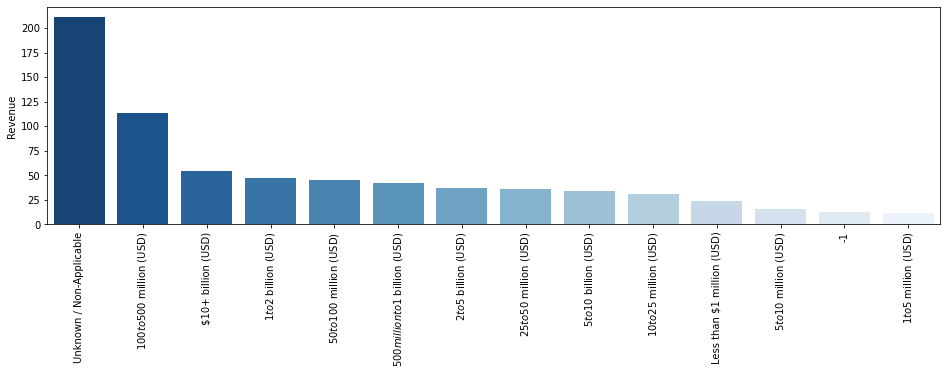

Graph for company_txt: total = 350


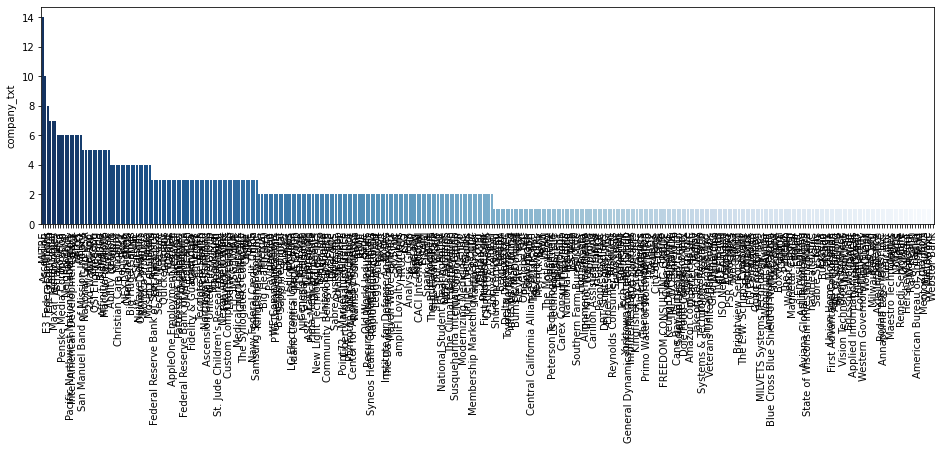

Graph for job_state: total = 37


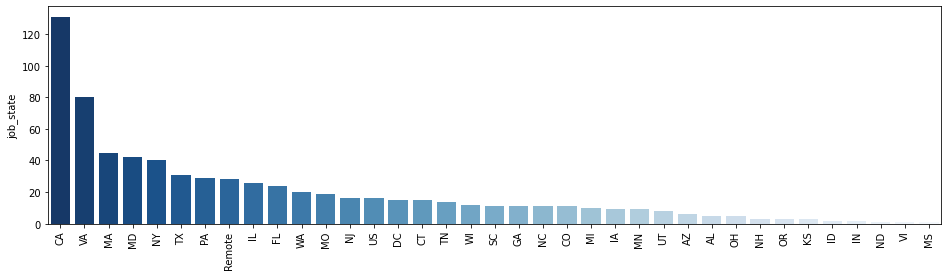

Graph for python_yn: total = 2


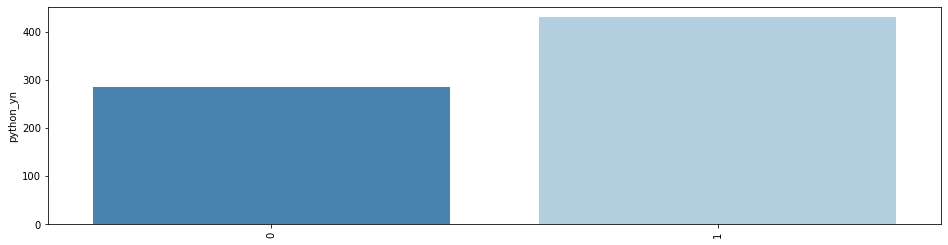

Graph for R_yn: total = 2


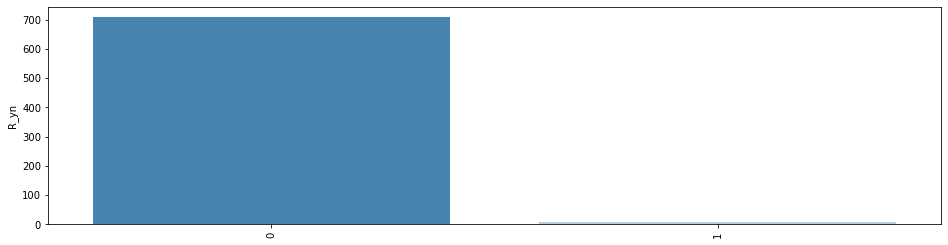

Graph for spark_yn: total = 2


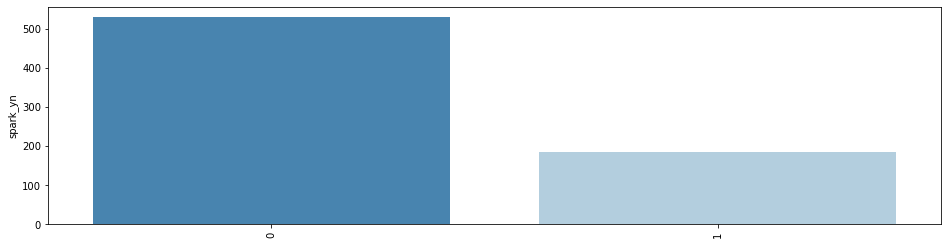

Graph for aws_yn: total = 2


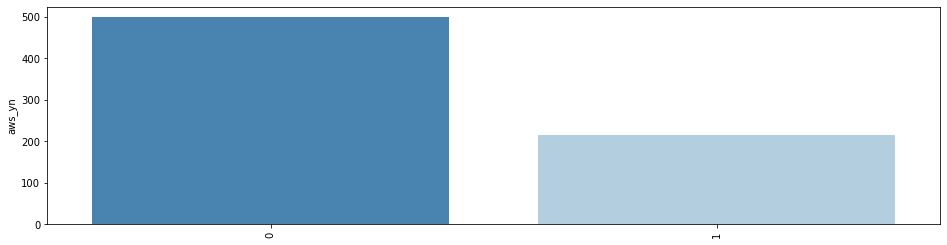

Graph for excel_yn: total = 2


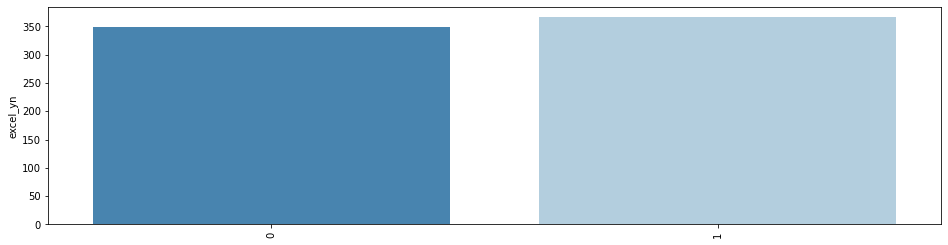

Graph for SQL_yn: total = 2


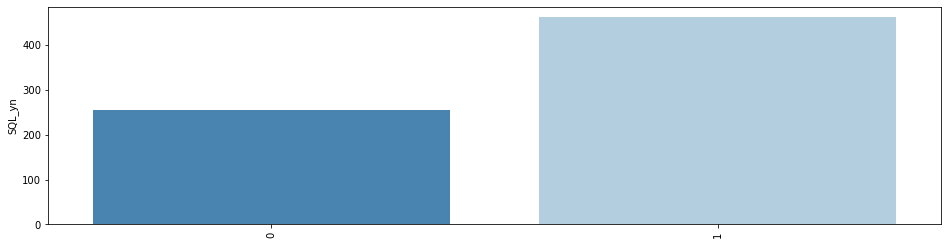

Graph for tableau_yn: total = 2


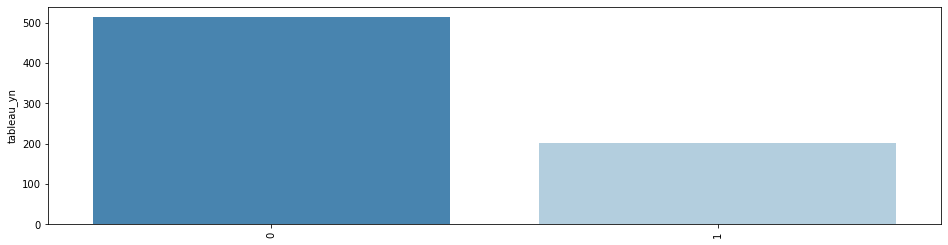

Graph for job_simp: total = 7


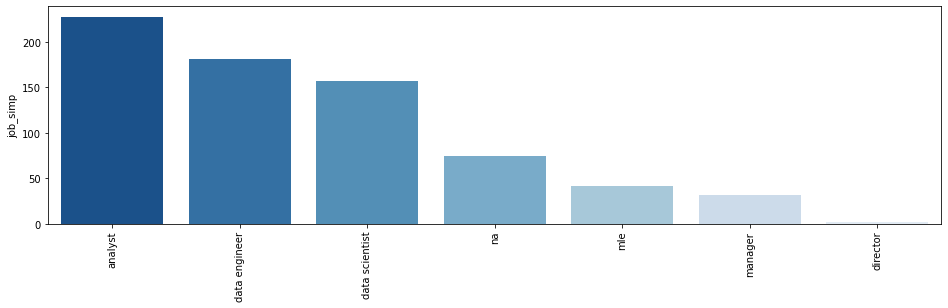

Graph for seniority: total = 3


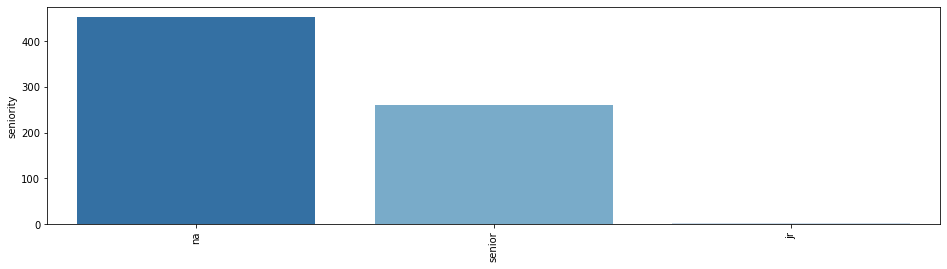

Graph for rating_bin: total = 5


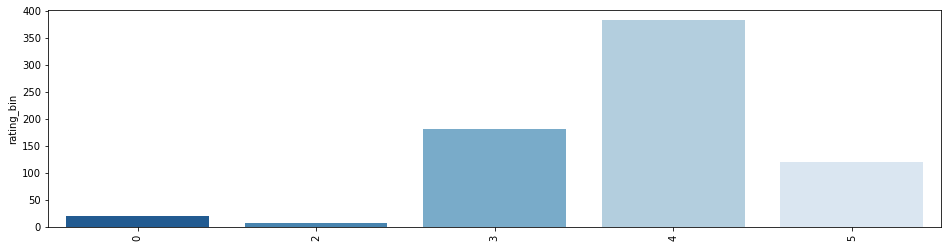

In [35]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    plt.figure(figsize=(16,4))
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette="Blues_r")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


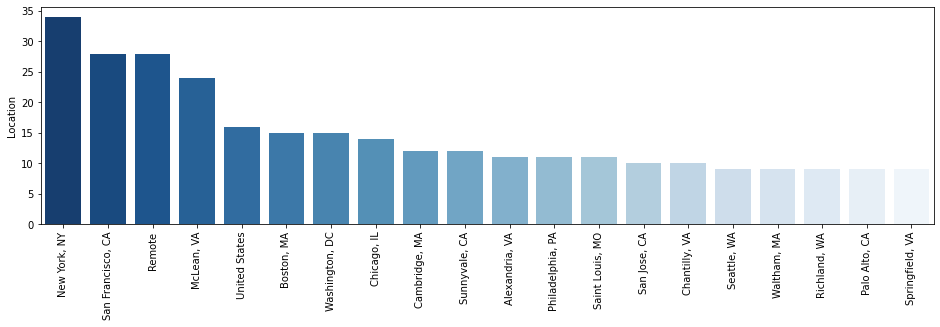

Graph for company_txt: total = 20


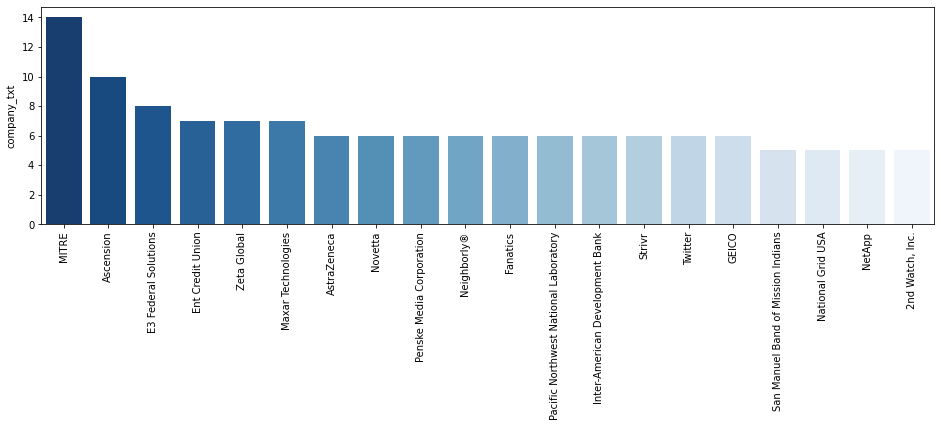

Graph for Industry: total = 20


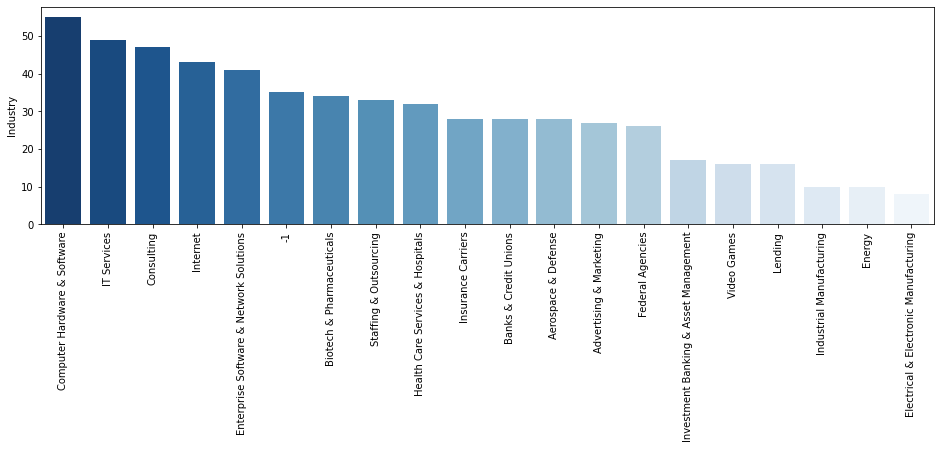

In [36]:
for i in df_cat[['Location', 'company_txt', 'Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    plt.figure(figsize=(16,4))
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette="Blues_r")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [37]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,109.980263
data engineer,106.143646
data scientist,106.958599
director,138.500000
manager,116.828125
mle,112.560976
na,104.141892


In [38]:
pd.pivot_table(df, index=['job_simp', 'seniority'] , values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          95.500000
               na         112.612403
               senior     106.778351
data engineer  na         106.895833
               senior     104.663934
data scientist na         105.814433
               senior     108.808333
director       na         138.500000
manager        na         112.543478
               senior     127.777778
mle            na         107.947368
               senior     116.545455
na             na         105.119048
               senior      98.545455

In [39]:
pd.pivot_table(df, index=['job_state', 'job_simp'], values='avg_salary', aggfunc='count').sort_values('job_state', ascending=True)

avg_salary
job_state job_simp                  
AL        analyst                  3
          data engineer            2
AZ        analyst                  3
          data engineer            1
          na                       2
CA        analyst                 25
          data engineer           28
          data scientist          32
          manager                  8
          mle                     23
          na                      15
CO        analyst                  7
          data engineer            3
          manager                  1
CT        data scientist           2
          analyst                 11
          data engineer            2
DC        analyst                  6
          data engineer            3
          data scientist           1
          na                       5
FL        analyst                 18
          data engineer            1
          manager                  1
          na                       4
GA        manager                  1
          analyst                  4
          data engineer            4
          data scientist           2
IA        data engineer            2
          mle                      3
          analyst                  4
ID        analyst                  2
IL        analyst                 11
          data engineer           10
          data scientist           3
          na                       2
IN        data engineer            2
KS        manager                  3
MA        na                       7
          mle                      4
          manager                  1
          analyst                  6
          data scientist          18
          data engineer            7
          director                 2
MD        na                      11
          data scientist          10
          analyst                 12
          data engineer            9
MI        data engineer            6
          manager                  2
          mle                      2
MN        analyst                  7
          data engineer            1
          data scientist           1
MO        na                       1
          analyst                  3
          data engineer            6
          data scientist           9
MS        analyst                  1
NC        na                       3
          data scientist           3
          analyst                  3
          data engineer            2
ND        analyst                  1
NH        analyst                  2
          data engineer            1
NJ        analyst                  7
          data engineer            3
          data scientist           2
          manager                  2
          na                       2
NY        analyst                  9
          data engineer           13
          data scientist          13
          manager                  4
          mle                      1
OH        data scientist           2
          analyst                  3
OR        analyst                  2
          data scientist           1
PA        analyst                 16
          data engineer           11
          data scientist           1
          na                       1
Remote    analyst                  9
          data engineer            8
          data scientist           8
          na                       3
SC        analyst                  5
          na                       6
TN        data scientist           4
          data engineer            1
          analyst                  9
TX        analyst                  6
          data engineer            8
          data scientist           9
          manager                  6
          na                       2
US        analyst                  4
          data engineer           10
          data scientist           1
          na                       1
UT        manager                  1
          data engineer            3
          data scientist      

In [40]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
UT,133.375000
DC,132.000000
MA,120.611111
PA,120.500000
CA,119.140625
US,117.000000
VA,111.947368
WI,109.500000
MO,104.500000


In [41]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'SQL_yn', 'tableau_yn', 'job_simp',
       'seniority', 'desc_len', 'rating_bin'],
      dtype='object')

In [36]:
# rating, industry, sector, revenue, python, spak, aws, excel, sql, tableau, desc_len, type of ownership

In [43]:
df_pivots = df[['rating_bin', 'Industry', 'Sector', 'Revenue', 'python_yn', 'spark_yn', 'aws_yn','excel_yn', 'SQL_yn', 'tableau_yn', 'desc_len', 'Type of ownership', 'avg_salary']]

In [46]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))
    print("\n")

rating_bin
            avg_salary
rating_bin            
5           110.396694
4           109.331593
3           106.505495
2           105.750000
0            93.095238


Industry
                                          avg_salary
Industry                                            
Religious Organizations                   158.000000
Education Training Services               158.000000
Logistics & Supply Chain                  141.800000
Transportation Management                 136.333333
Consumer Electronics & Appliances Stores  133.500000
Real Estate                               133.000000
Express Delivery Services                 132.000000
TV Broadcast & Cable Networks             132.000000
Financial Transaction Processing          123.250000
Industrial Manufacturing                  120.850000
Staffing & Outsourcing                    118.954545
Insurance Agencies & Brokerages           118.833333
Sporting Goods Stores                     118.000000
Federal Agencies      

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [47]:
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),19,28
$1 to $5 million (USD),2,10
$10 to $25 million (USD),6,25
$10+ billion (USD),27,27
$100 to $500 million (USD),52,61
$2 to $5 billion (USD),9,28
$25 to $50 million (USD),10,26
$5 to $10 billion (USD),16,18
$5 to $10 million (USD),5,11


In [48]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

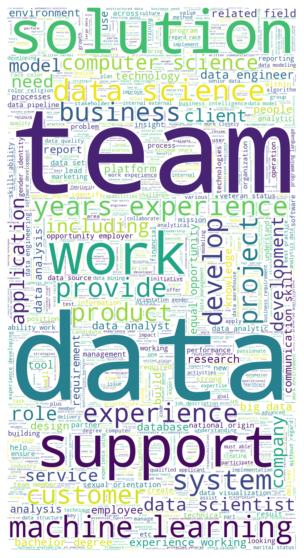

In [49]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [50]:
df.to_csv('eda_data.csv', index=False)